In [58]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

In [59]:
data =  pd.read_csv('all_data_compiled_v2.csv')
print(data)

      index_compiled  index  class   B_B_FLUX_AP  B_B_FLUX_AP_HI  \
0                  0    381    0.0  9.242144e-05    9.705341e-05   
1                  1     16    0.0  0.000000e+00    2.872928e-07   
2                  2    609    0.0  1.837338e-07    3.241252e-07   
3                  3    899    0.0  8.687616e-04    9.042357e-04   
4                  4    255    1.0  2.476895e-06    3.001842e-06   
...              ...    ...    ...           ...             ...   
1369            1369    829    0.0  2.162662e-05    2.265193e-05   
1370            1370    113    0.0  9.741220e-07    1.191529e-06   
1371            1371    347    0.0  1.940850e-05    2.099448e-05   
1372            1372    396    1.0  3.216266e-05    3.517495e-05   
1373            1373    910    0.0  0.000000e+00    0.000000e+00   

      B_B_FLUX_AP_LO  B_M_FLUX_AP  B_M_FLUX_AP_HI  B_M_FLUX_AP_LO  \
0       8.740741e-05     0.000063        0.000081        0.000044   
1       0.000000e+00     0.000005        0.00

In [60]:
print(data.shape)
x = data.drop(['index_compiled', 'index', 'class'],axis=1)
print(x.shape)
y = data['class']
y.shape

(1374, 501)
(1374, 498)


(1374,)

In [61]:
def split_data(x,y,s):   
    x =  x.to_numpy()
    y =  y.to_numpy()
    split = s
    split_no = int(split*len(y))
    x_train = x[:split_no, :]
    y_train = y[:split_no]
    x_test = x[split_no:, :]
    y_test = y[split_no:]
    return ((x_train,y_train) , (x_test ,y_test))

(x_train,y_train),(x_test,y_test) = split_data(x, y, 0.7)
print(x_train.shape ,y_train.shape)
print(x_test.shape ,y_test.shape)

(961, 498) (961,)
(413, 498) (413,)


# Neural Netork starts here

In [62]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [63]:
one_hot_y_train =  to_categorical(y_train)
one_hot_y_test =  to_categorical(y_test)

Epoch 1/40
27/27 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.6701 - val_loss: nan - val_accuracy: 0.6804
Epoch 2/40
27/27 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 3/40
27/27 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 4/40
27/27 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 5/40
27/27 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 6/40
27/27 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 7/40
27/27 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6910 - val_loss: nan - val_accuracy: 0.6804
Epoch 8/40
27/27 [==============================] - 0s 4ms/st

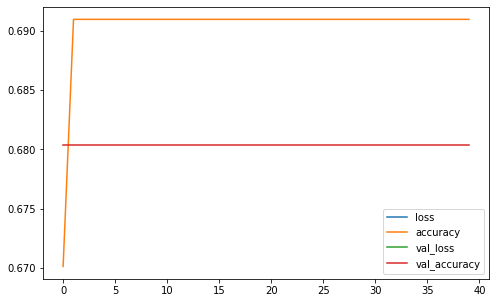

In [64]:
def model_gen(shape):

    inputs =  keras.Input(shape=(498,))
    dense =  layers.Dense(64, activation='relu')
    x = dense(inputs)
    x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    for s in shape:
        x = layers.Dense(64, activation='relu')(x)
    x =  layers.BatchNormalization(axis=-1)(x)
    outputs = layers.Dense(2 , activation='sigmoid')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([64,64,32,8])
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=40, validation_split=0.1)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [55]:
def acc_score(model , y_test , x_test):
    y_pred = model.predict(x_test)
    correct = 0
    total =  len(y_test)
    for y1,y2 in zip(y_pred,y_test):
        if(int(y1)==int(y2)):
            correct+=1
        else:
            continue
    print('correct prediction :' , correct)
    print('total prediction :' , total)
    print('score: ' , correct/total*100)
    
print('training data prediction')
acc_score(model, one_hot_y_train, x_train)
print('----------------------------------')
print('test data prediciton')
acc_score(model, y_test, x_test)

training data prediction


TypeError: only size-1 arrays can be converted to Python scalars

In [56]:
res = model.predict(x_test)
res = [np.argmax(r) for r in res]
#print(res)

In [57]:
count = 0
for a,b in zip(res,y_test):
    print(a,b)
    if(int(a)==int(b)):
        count+=1
print(count , len(y_test))
print(count/len(y_test))

0 0.0
0 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 0.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
1 1.0
1 0.0
1 1.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
1 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
0 1.0
0 1.0
1 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 0.0
0 0.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.